In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

sns.set()

## Import preprocessed data

In [2]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [3]:
df.head()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376


In [4]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x_education_2nd Cycle', 'x_education_Graduation', 'x_education_Master',
       'x_education_PhD', 'x_status_Married', 'x_status_Single',
       'x_status_Together', 'x_status_Widow', 'x_gender_M', 'x_dependents_1.0',
       'x_description_Kind of OK', 'x_description_Meh...',
       'x_description_OK nice!', 'x_description_Take my money!!', 'PC0', 'PC1',
       'PC2'],
      dtype='object')

In [5]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

## Hierarchical Clustering

What is hierarchical clustering? How does it work? How does it relate to the distance matrix we discussed at the beggining of the course? ;)

### Different types of linkage
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)

### How are they computed?
![](../figures/linkage_types.jpeg)

**Ward linkage**: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

### The distance matrix
![](../figures/hc_distance_matrix.png)

### Characteristics:
- *bottom up approach*: each observation starts in its own cluster, and clusters are successively merged together
- *greedy/local algorithm*: at each iteration tries to minimize the distance of cluster merging
- *no realocation*: after an observation is assigned to a cluster, it can no longer change
- *deterministic*: you always get the same answer when you run it
- *scalability*: can become *very slow* for a large number of observations

### How to apply Hierarchical Clustering?
**Note: Which types of variables should be used for clustering?**

In [6]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])
hc_labels

array([0, 0, 1, ..., 1, 2, 2])

In [7]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
0,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598,...,0.117424,0.638528,0.175866,0.082251,0.088203,0.456710,0.370130,0.746026,2.063737,-0.345349
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319,...,0.008765,0.633865,0.927490,0.329482,0.328287,0.335060,0.000000,-1.186206,-0.872564,-0.645961
2,0.583921,0.696600,0.028464,0.512591,-0.310472,-0.414163,-0.309056,-0.288473,-0.184634,1.123735,...,0.064531,0.652076,0.754061,0.145758,0.148466,0.424188,0.281137,1.536198,0.181397,0.429003
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724,...,0.018120,0.664779,0.793884,0.335221,0.335221,0.319366,0.001133,-3.430678,0.583211,0.999316
4,-0.141469,-0.441731,-0.195457,1.235357,-0.700710,-1.054846,-0.723419,-0.668869,0.418864,-0.230577,...,0.027206,0.640441,0.953676,0.334559,0.315441,0.336765,0.007353,0.899848,-1.868089,0.313602


### Defining the linkage method to choose:

**We need to understand that:**
$$SS_{t} = SS_{w} + SS_{b}$$

---

$$SS_{t} = \sum\limits_{i = 1}^n {{{({x_i} - \overline x )}^2}}$$

$$SS_{w} = \sum\limits_{k = 1}^K {\sum\limits_{i = 1}^{{n_k}} {{{({x_i} - {{\overline x }_k})}^2}} }$$

$$SS_{b} = \sum\limits_{k = 1}^K {{n_k}{{({{\overline x }_k} - \overline x )}^2}}$$

, where $n$ is the total number of observations, $x_i$ is the vector of the $i^{th}$ observation, $\overline x$ is the centroid of the data, $K$  is the number of clusters, $n_k$ is the number of observations in the $k^{th}$ cluster and $\overline x_k$ is the centroid of the $k^{th}$ cluster.

In [8]:
# Computing SST
X = df[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

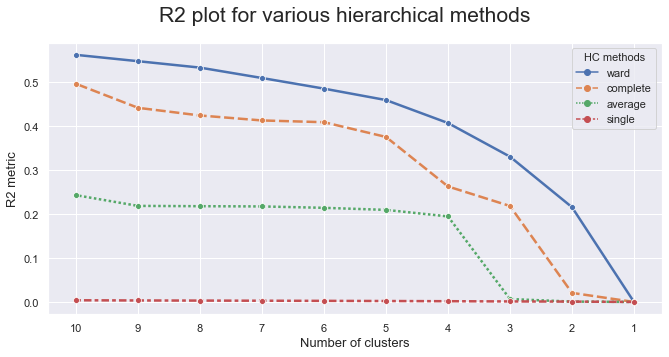

In [10]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

### Defining the number of clusters:

Where is the **first big jump** on the Dendrogram?

In [11]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

array([6069, 7663, 7833, ...,    4,    1,    0])

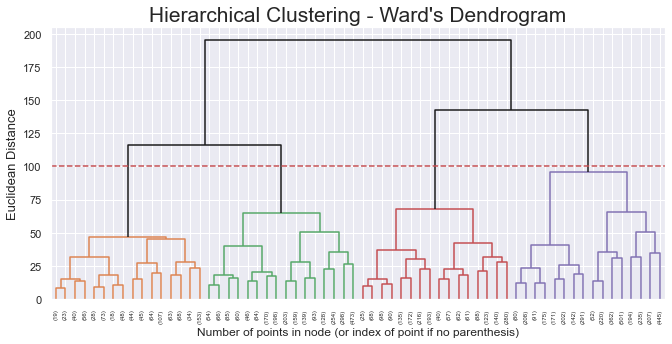

In [12]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Final Hierarchical clustering solution

In [13]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(df[metric_features])

In [14]:
# Characterizing the 4 clusters
df_concat = pd.concat((df, pd.Series(hc4_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
0,0.308045,0.263678,-0.056696,0.787469,-0.458885,-0.657823,-0.466644,-0.433142,0.044884,0.608672,...,0.050336,0.647651,0.829978,0.217562,0.211969,0.390940,0.177013,1.294186,-0.598050,0.385115
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319,...,0.008765,0.633865,0.927490,0.329482,0.328287,0.335060,0.000000,-1.186206,-0.872564,-0.645961
2,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598,...,0.117424,0.638528,0.175866,0.082251,0.088203,0.456710,0.370130,0.746026,2.063737,-0.345349
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724,...,0.018120,0.664779,0.793884,0.335221,0.335221,0.319366,0.001133,-3.430678,0.583211,0.999316


In [15]:
# 5 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc5lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
hc5_labels = hc5lust.fit_predict(df[metric_features])

In [16]:
# Characterizing the 5 clusters
df_concat = pd.concat((df, pd.Series(hc5_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
0,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598,...,0.117424,0.638528,0.175866,0.082251,0.088203,0.456710,0.370130,0.746026,2.063737,-0.345349
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319,...,0.008765,0.633865,0.927490,0.329482,0.328287,0.335060,0.000000,-1.186206,-0.872564,-0.645961
2,0.583921,0.696600,0.028464,0.512591,-0.310472,-0.414163,-0.309056,-0.288473,-0.184634,1.123735,...,0.064531,0.652076,0.754061,0.145758,0.148466,0.424188,0.281137,1.536198,0.181397,0.429003
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724,...,0.018120,0.664779,0.793884,0.335221,0.335221,0.319366,0.001133,-3.430678,0.583211,0.999316
4,-0.141469,-0.441731,-0.195457,1.235357,-0.700710,-1.054846,-0.723419,-0.668869,0.418864,-0.230577,...,0.027206,0.640441,0.953676,0.334559,0.315441,0.336765,0.007353,0.899848,-1.868089,0.313602
